<h1><center>Comparativo dos métodos Critical Line Algorithm (CLA) e Hierarchical Risk Parity (HRP) para ativos brasileiros</center></h1>

O presente código visa comparar os métodos de Markowitz (CLA) e de Marcos Lopez (HRP) na criação de portifólio. São adquiridos dados dos ativos via yahoo finance, calculados os pesos das carteiras, seu risco e demais parâmetros necessários. Ao final há um comparativo de performance das carteiras para um período de um ano posterior aos cálculos iniciais.
<ul>
    <li> <b>Autor: Thales G. Motta</b> </li>
</ul>


In [1]:
teste2=['ALZR11.SA',
'BBPO11.SA',
'BCFF11.SA',
'BRCR11.SA',
'BCRI11.SA',
'BRCO11.SA',
'BTLG11.SA',
'CPTS11.SA',
'HGCR11.SA',
'HGLG11.SA',
'HGRU11.SA',
'VRTA11.SA',
'GTWR11.SA',
'GGRC11.SA',
'HABT11.SA',
'HCTR11.SA',
'HGBS11.SA',
'HGRE11.SA',
'HSML11.SA',
'HFOF11.SA',
'IRDM11.SA',
'JSRE11.SA',
'KNRI11.SA',
'KNIP11.SA',
'KNCR11.SA',
'MALL11.SA',
'MCCI11.SA',
'MXRF11.SA',
'MGFF11.SA',
'PATC11.SA',
'QAGR11.SA',
'RBRP11.SA',
'RBRF11.SA',
'RBRR11.SA',
'RECR11.SA',
'RECT11.SA',
'RCRB11.SA',
'RBVA11.SA',
'SDIL11.SA',
'TGAR11.SA',
'VGIR11.SA',
'LVBI11.SA',
'VINO11.SA',
'VISC11.SA',
'VILG11.SA',
'XPCI11.SA',
'XPIN11.SA',
'XPLG11.SA',
'XPCM11.SA',
'XPML11.SA',
'XPPR11.SA']

Symbols=['ABCB4.SA',
'B3SA3.SA',
'BMGB4.SA',
'BIDI4.SA',
'BIDI11.SA',
'BPAN4.SA',
'BRSR6.SA',
'BBSE3.SA',
'BBDC3.SA',
'BBDC4.SA',
'BBAS3.SA',
'BPAC11.SA',
'CIEL3.SA',
'IRBR3.SA',
'ITSA4.SA',
'ITUB3.SA',
'ITUB4.SA',
'PSSA3.SA',
'SANB11.SA',
'SULA11.SA',
'AALR3.SA',
'ALPA4.SA',
'ABEV3.SA',
'ANIM3.SA',
'ARZZ3.SA',
'BTOW3.SA',
'BKBR3.SA',
'BRFS3.SA',
'CAML3.SA',
'CRFB3.SA',
'CEAB3.SA',
'CNTO3.SA',
'HGTX3.SA',
'COGN3.SA',
'CVCB3.SA',
'CYRE3.SA',
'DIRR3.SA',
'EVEN3.SA',
'EZTC3.SA',
'FLRY3.SA',
'GFSA3.SA',
'GRND3.SA',
'NTCO3.SA',
'SOMA3.SA',
'GUAR3.SA',
'HAPV3.SA',
'HBOR3.SA',
'HYPE3.SA',
'PARD3.SA',
'MEAL3.SA',
'GNDI3.SA',
'MYPK3.SA',
'JBSS3.SA',
'JHSF3.SA',
'RENT3.SA',
'LCAM3.SA',
'LAME3.SA',
'LAME4.SA',
'AMAR3.SA',
'LREN3.SA',
'MDIA3.SA',
'MGLU3.SA',
'MRFG3.SA',
'LEVE3.SA',
'BEEF3.SA',
'MTRE3.SA',
'MOVI3.SA',
'MRVE3.SA',
'ODPV3.SA',
'QUAL3.SA',
'LJQQ3.SA',
'RADL3.SA',
'SMTO3.SA',
'SEER3.SA',
'SLCE3.SA',
'SMLS3.SA',
'TCSA3.SA',
'TEND3.SA',
'TRIS3.SA',
'VVAR3.SA',
'VIVA3.SA',
'VULC3.SA',
'YDUQ3.SA',
'TIET11.SA',
'ALUP11.SA',
'CMIG4.SA',
'CESP6.SA',
'COCE5.SA',
'CPLE6.SA',
'CPFE3.SA',
'ELET3.SA',
'ENBR3.SA',
'ENGI11.SA',
'ENEV3.SA',
'EGIE3.SA',
'EQTL3.SA',
'LIGT3.SA',
'NEOE3.SA',
'OMGE3.SA',
'TAEE11.SA',
'TRPL4.SA',
'BRAP4.SA',
'BRKM5.SA',
'DTEX3.SA',
'GGBR4.SA',
'GOAU4.SA',
'KLBN11.SA',
'CSNA3.SA',
'SUZB3.SA',
'UNIP6.SA',
'USIM5.SA',
'VALE3.SA',
'EMBR3.SA',
'POMO4.SA',
'POSI3.SA',
'RAPT4.SA',
'TASA4.SA',
'TUPY3.SA',
'WEGE3.SA',
'ALSO3.SA',
'BRML3.SA',
'BRPR3.SA',
'IGTA3.SA',
'JPSA3.SA',
'LOGG3.SA',
'LPSB3.SA',
'MULT3.SA',
'CMIG3.SA',
'CSMG3.SA',
'CPLE3.SA',
'ELET6.SA',
'SBSP3.SA',
'SAPR4.SA',
'SAPR11.SA',
'VIVT3.SA',
'TIMS3.SA']



<div id="Importação de bibliotecas e aquisição dos dados históricos dos ativos e seus parâmetros.">
    <h2>1) Importação de bibliotecas e aquisição dos dados históricos dos ativos e seus parâmetros.</h2>
</div>


In [2]:
# Importing packages
import pandas as pd
from portfoliolab.clustering.hrp import HierarchicalRiskParity
import seaborn as sns
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import math
from pandas_datareader import data
from tqdm import tqdm
import random
from pandas_datareader import data as wb

start_date = '2015-01-01'
end_date='2018-12-31'

output = None
sym=[]
for sy in tqdm(Symbols): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date, end_date)["Adj Close"]
        
        if output is None:
            df = stock
            output = df    
            sym.append(sy[:-3])
        else:
            df = stock
            output=pd.concat([output,df],axis=1)     
            sym.append(sy[:-3])
    except:
        print("Erro "+sy)
output.columns=sym
output.head()

  2%|▏         | 3/136 [00:08<05:48,  2.62s/it]

Erro BMGB4.SA


  4%|▎         | 5/136 [00:15<06:24,  2.93s/it]

Erro BIDI11.SA


 23%|██▎       | 31/136 [01:44<04:37,  2.64s/it]

Erro CEAB3.SA


 24%|██▎       | 32/136 [01:48<05:21,  3.09s/it]

Erro CNTO3.SA


 29%|██▊       | 39/136 [02:12<06:03,  3.75s/it]

Erro EZTC3.SA


 32%|███▏      | 43/136 [02:27<06:11,  3.99s/it]

Erro NTCO3.SA


 32%|███▏      | 44/136 [02:32<06:43,  4.38s/it]

Erro SOMA3.SA


 35%|███▌      | 48/136 [02:50<06:35,  4.50s/it]

Erro HYPE3.SA


 49%|████▊     | 66/136 [03:57<04:48,  4.12s/it]

Erro MTRE3.SA


 52%|█████▏    | 71/136 [04:22<04:39,  4.30s/it]

Erro LJQQ3.SA


 60%|█████▉    | 81/136 [04:58<03:14,  3.54s/it]

Erro VIVA3.SA


 62%|██████▏   | 84/136 [05:08<02:50,  3.29s/it]

Erro TIET11.SA


 72%|███████▏  | 98/136 [05:50<01:39,  2.63s/it]

Erro NEOE3.SA


100%|██████████| 136/136 [07:57<00:00,  3.51s/it]

Erro TIMS3.SA


,ABCB4,B3SA3,BIDI4,BPAN4,BRSR6,BBSE3,BBDC3,BBDC4,BBAS3,BPAC11,...,LPSB3,MULT3,CMIG3,CSMG3,CPLE3,ELET6,SBSP3,SAPR4,SAPR11,VIVT3
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,6.409033,1.601580,NaN,2.107640,8.996696,18.853857,13.645925,12.794758,15.825444,NaN,...,6.199080,13.125120,9.332209,5.372109,8.508423,5.738757,14.271121,3.325977,NaN,23.542837
2015-01-05,6.357965,1.557791,NaN,1.979349,8.933780,18.288549,13.484602,12.828257,15.497068,NaN,...,5.923568,13.107328,9.165685,5.627719,8.160706,5.637442,14.271121,3.094604,NaN,23.075954
2015-01-06,6.204762,1.572948,NaN,1.970185,8.235435,19.065069,13.844202,13.250279,15.713656,NaN,...,6.169565,13.759787,9.158733,5.668880,8.036522,5.861782,14.228648,3.094604,NaN,22.503265
2015-01-07,6.082197,1.635263,NaN,1.961022,8.682124,18.760672,14.455486,13.776808,16.405365,NaN,...,6.248280,14.234234,9.262775,5.833505,8.444556,6.064411,14.525964,3.181369,NaN,23.275162
2015-01-08,6.087307,1.613366,NaN,2.016003,8.430469,18.704765,14.487509,13.847818,16.461258,NaN,...,6.169565,14.082994,9.117104,5.762023,8.441010,5.869018,14.576930,3.297056,NaN,24.221355


<b>Tratando os dados para excluir ativos sem histórico suficiente</b>  



['Erros', 9648, 'Ativos', 122]

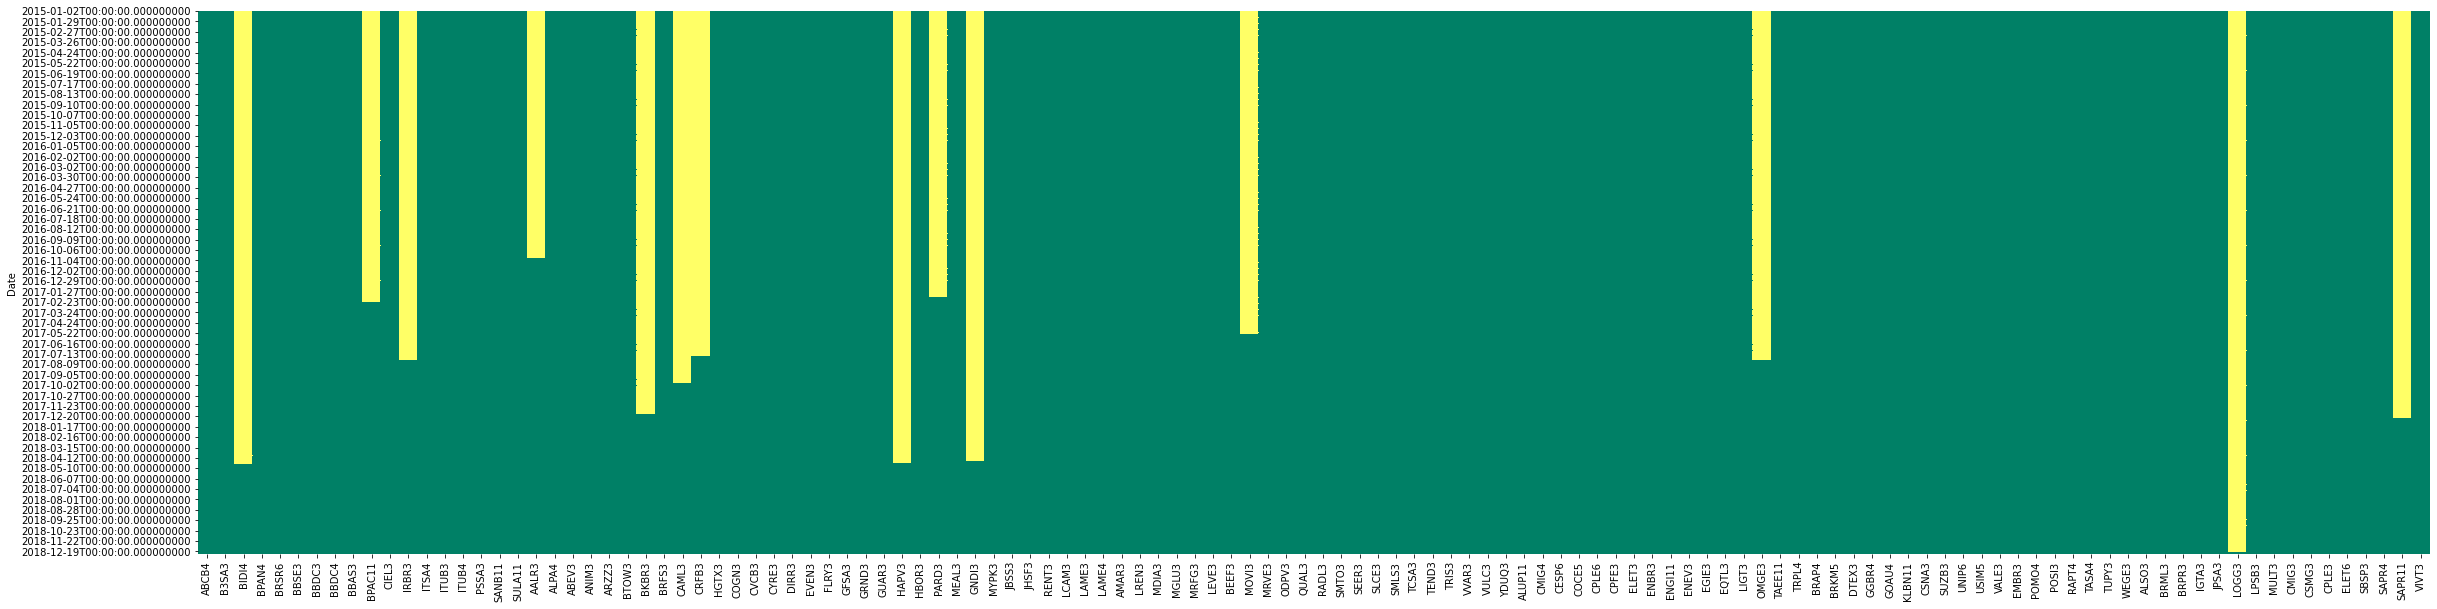

In [3]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

['Erros', 0, 'Ativos', 108]

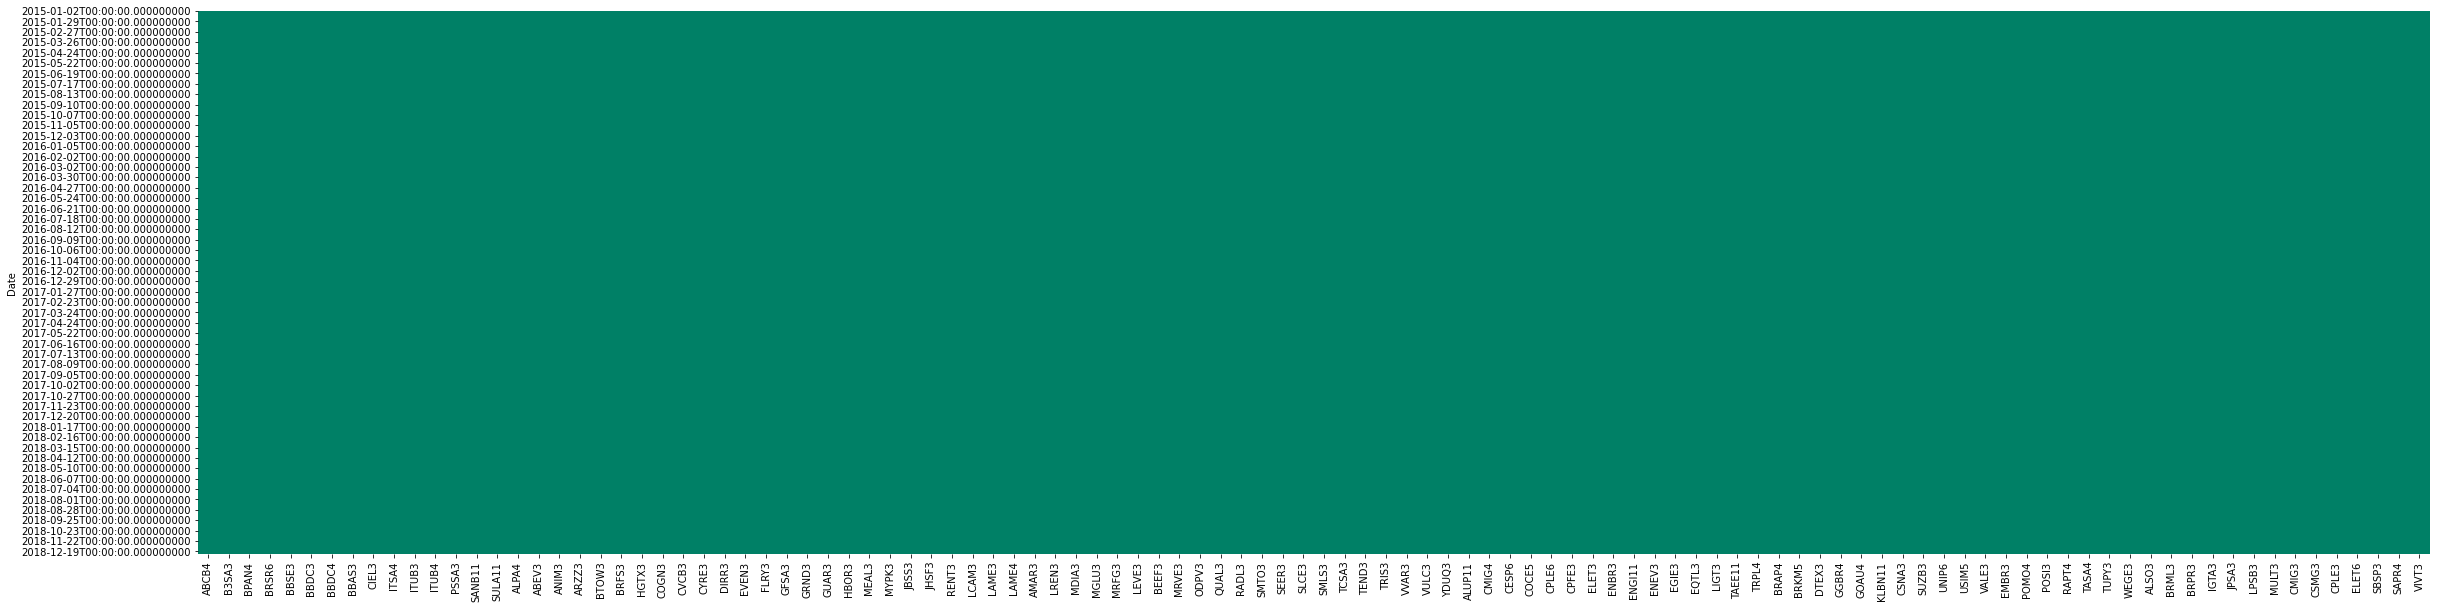

In [4]:
output=output.dropna(axis='columns')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

<b>Escolhas da quantidade de ativos "N" e print dos ativos escolhidos</b>  

In [5]:
N=10 #Número de papéis da carteira
escolhas=random.sample(list(output.columns), N)

In [6]:
preços=output[escolhas]

<b>Print do histórico diário dos ativos selecionados</b>  

In [7]:
preços

,YDUQ3,ITUB3,CIEL3,DTEX3,MEAL3,RADL3,WEGE3,QUAL3,LIGT3,MULT3
Date,,,,,,,,,,
2015-01-02,16.707964,11.929143,17.443592,6.158757,11.773314,4.584503,10.418848,17.092577,15.393254,13.125120
2015-01-05,15.707761,11.794489,16.850760,6.206870,11.523879,4.553317,10.489826,17.245928,14.759415,13.107328
2015-01-06,14.790909,11.909864,16.512609,6.126680,11.025010,4.685403,10.334238,17.501522,15.393254,13.759787
2015-01-07,14.328691,12.179256,16.666277,6.319138,10.975121,4.766123,10.215861,17.252321,15.357035,14.234234
2015-01-08,14.775753,12.352393,17.127371,6.375276,10.615937,4.778964,10.388328,16.958391,15.574352,14.082994
...,...,...,...,...,...,...,...,...,...,...
2018-12-20,22.127241,26.866871,8.235406,10.656434,6.739077,11.383307,16.715281,11.328687,15.828190,22.476786
2018-12-21,21.690958,26.416079,8.280905,10.309655,6.978688,11.647390,16.802488,11.113311,15.557456,22.053965
2018-12-26,21.340031,26.145607,8.080708,10.534594,6.988672,11.391190,16.522017,10.932397,15.557456,21.986696


<b>Plot do histórico de preços na forma de gráfico</b>  

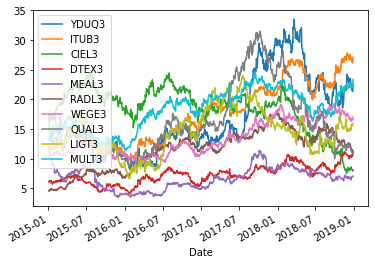

In [8]:
preços.plot()
plt.show()

<b>Plot dos retornos dos ativos</b>  

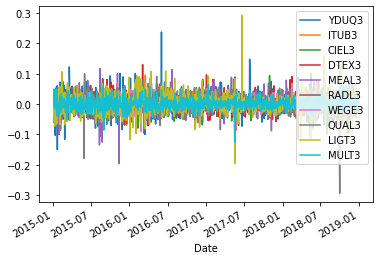

In [9]:
retornos = preços.pct_change().iloc[1:]

retornos.plot()
plt.show()

<b>Plot da tabela com resumo estatístico dos retornos</b>  

In [10]:
retornos.describe()

,YDUQ3,ITUB3,CIEL3,DTEX3,MEAL3,RADL3,WEGE3,QUAL3,LIGT3,MULT3
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,0.000824,0.000982,-0.000559,0.000905,-0.000164,0.001076,0.000661,-0.000037,0.000522,0.000754
std,0.032394,0.017600,0.020680,0.025088,0.026297,0.018511,0.018156,0.027735,0.031378,0.018602
min,-0.150388,-0.099170,-0.097484,-0.131799,-0.196356,-0.064206,-0.091045,-0.293689,-0.195652,-0.124473
25%,-0.017399,-0.008892,-0.012276,-0.014511,-0.014309,-0.010645,-0.010711,-0.015360,-0.016438,-0.010281
50%,0.000526,0.000951,-0.001041,0.000000,0.000000,0.000362,0.000000,0.000000,-0.001460,0.000000
75%,0.019278,0.011032,0.011003,0.015367,0.012500,0.012351,0.011775,0.015436,0.017107,0.011161
max,0.237365,0.095517,0.094376,0.130303,0.116861,0.083220,0.070989,0.109106,0.292574,0.069192


<div id="Matrizes de correlação e covariância.">
    <h2>2) Matrizes de correlação e covariância dos retornos.</h2>
</div>

  <p> Considerando o escopo que envolve multiplos ativos, o processo operacional passa a ser matricial. Assim, a expectativa de retorno, $\boldsymbol{\mu}$, é um vetor de tamanho <b> Nx1</b> é definido como
 </p>&emsp;




 <li>$\textbf{r}(n)  = [r_1(n) \ r_2(n)  \ ... \ r_N(n) ]^T$  </li> &emsp;
  <li>$\boldsymbol{\mu}  = [\mu_1 \ \mu_2  \ ... \ \mu_N ]^T$</li> &emsp; 
  <p> E as matrizes  de   covariâcia  ($\textbf{C}$)  e   correlação  ($\textbf{P}$)  para  ativos  do  portfolio são </p>
   &emsp;
  <li>$\textbf{C} = [C_ {ij}]=E\{r_i(n)r_j(n)\}-\mu_i\mu_j$ </li>
  <p></p>
  <li>$\textbf{P} = [P_ {ij}]=\frac{E\{r_i(n)r_j(n)\}-\mu_i\mu_j}{\sigma_i\sigma_j}$</li>
  <p>Determinando a matriz diagonal de volatilidade de tamanho $NxN$ como</p>  &emsp;
  <li> $\sum=\begin{bmatrix}
    \sigma_1 & . & . & 0  \\
    . & \sigma_2 & . & .  \\
    . & . & . & .  \\
    0 & . & . & \sigma_N 
  \end{bmatrix}  $ </li> &emsp;
  <p>É possível identificar</p>  &emsp;
  <li>$\textbf{C}=E\{\textbf{r}(n)\textbf{r}^T(n)\}-\boldsymbol{\mu}\boldsymbol{\mu}^T=\sum^T\textbf{P}\sum$</li>

<b>Matriz de Correlações</b>  

Text(0.5, 1.0, 'Correlações entre ativos ')

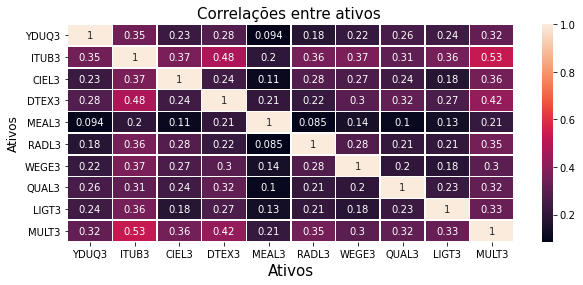

In [11]:
P=retornos.corr()
f, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(P, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Correlações entre ativos ",fontsize=15)

<b>Matriz de Covariância</b>  

Text(0.5, 1.0, 'Matriz Covariância')

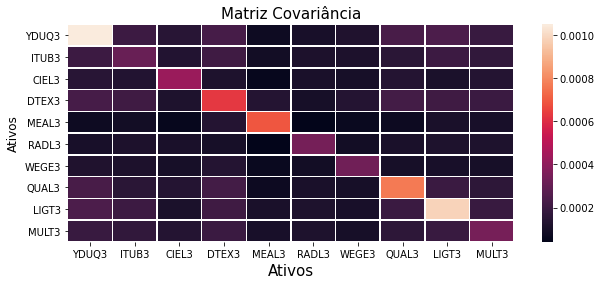

In [12]:
C=retornos.cov()
f, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(C, annot=False, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Matriz Covariância",fontsize=15)

<div id="Cálculo dos pesos no método Hierarchical Risk Parity">
    <h2>3) Cálculo dos pesos no método Hierarchical Risk Parity (HRP).</h2>
</div>

<b>Calculado via biblioteca contendo o método criado pelo professor Marcos Lopez. Pesos já em porcentagem.</b>  

In [13]:
# Computing HRP weights
hrp = HierarchicalRiskParity()
hrp.allocate(asset_prices=preços)
hrp_weights = hrp.weights
print(hrp_weights*100)

       MEAL3     QUAL3     YDUQ3      RADL3     LIGT3      CIEL3      WEGE3  \
0  10.053353  9.037981  6.106652  15.817236  5.504934  12.021791  15.597173   

      DTEX3     ITUB3     MULT3  
0  7.367407  9.758519  8.734952  


<b>Hierarquia criada pelo algoritmo HRP entre os ativos</b>  

Text(0.5, 1.0, 'Hierarchical Clustering Dendogram')

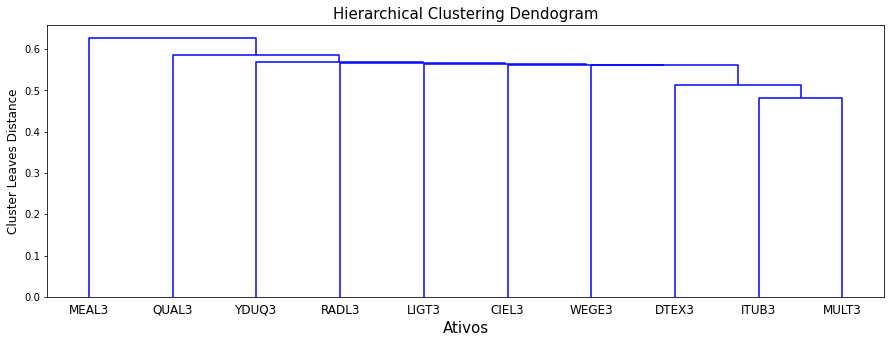

In [14]:
f, ax = plt.subplots(figsize=(15, 5))
# Plot Dendrogram
hrp.plot_clusters(assets=preços.columns)
plt.yticks(rotation=0) 
ax.set_ylabel("Cluster Leaves Distance",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Hierarchical Clustering Dendogram",fontsize=15)

<div id="Cálculo dos pesos no método Critical Line Algorithm">
    <h2>4) Cálculo dos pesos no método Critical Line Algorithm (CLA).</h2>
</div>

<b>Pelo algoritmo CLA também implementado pelo professor Marcelo Lopez</b>  

In [15]:
from portfoliolab.modern_portfolio_theory import CriticalLineAlgorithm

# Aquisição de dados
preçosCLA=preços

cla = CriticalLineAlgorithm(weight_bounds=(0, 1))

# Minimum Variance Solution
cla.allocate(asset_prices=preçosCLA, solution='min_volatility')
cla_weights = cla.weights
min_variance_value = cla.min_var # Accessing the min-variance value

<b>Mínima variância obtida pelo método CLA</b>  

In [16]:
min_variance_value

array([[0.01224062]])

<b>Pesos através do método CLA com restrições para não exister peso menor que zero e totalizar 100%</b>  

In [17]:
pesosCLA=cla_weights.T
pesosCLA.columns=['Pesos']

pesosCLA


,Pesos
YDUQ3,0.008097
ITUB3,0.122524
CIEL3,0.129512
DTEX3,0.003445
MEAL3,0.129456
RADL3,0.217953
WEGE3,0.228527
QUAL3,0.044875
LIGT3,0.014882
MULT3,0.100728


In [18]:
matrixpesos=np.array([pesosCLA['Pesos']])

In [19]:

retornos = preços.pct_change().iloc[1:]

sig=retornos.std()

I=pd.DataFrame(np.identity(len(C)))

SIGMA=(C*(I.values))**0.5


<div id="Plot de carteiras aleatórias e Fronteira de Markowitz">
    <h2>5) Plot de carteiras aleatórias e Fronteira de Markowitz.</h2>
</div>

  <p> Em uma carteira de <b>N-ativos
para compor o portfolio</b>. O retorno é expresso como </p>&emsp;
  <li>$r_p=\textbf{q}^T\textbf{r}=\sum_{i=1}^{n}q_ir_i$  </li> &emsp;
   <p>Onde $q$ e um vetor $Nx1$ relacionado à alocação de capital e definido por</p>
   &emsp;
  <li>$\boldsymbol{q}  = [q_1 \ q_2  \ ... \ q_N ]^T$ </li>
  <p></p>
  <p>Assim, a <b>expectativa de retorno</b> do portfolio é calculado por</p>  &emsp;
  <li> $\mu_p = E\{r_p\} = \boldsymbol{q}^T E\{\textbf{r}\} = \boldsymbol{q}^T  \boldsymbol{\mu} $  </li> &emsp;
   <p>E o seu <b>risco</b> como</p>  &emsp;
  <li> $\sigma_p = (E\{r_p^2 \}-\mu_p^2)^{1/2}= (\boldsymbol{q}^T  \textbf{C} \boldsymbol{q})^{1/2}$  </li> &emsp;

<b>Função para criar diversos portifólios aleatórios</b>  

In [20]:
def Portfolios(ret,ports):
    retp=[]
    risp=[]
    pesos=[]
    C=ret.cov()
    MU=ret.mean()
    SIG=ret.std()
    N=len(ret.columns)
    for i in tqdm(range(ports)):
        q = [random.randint(0,10000) for i in range(1,N+1)]
        s = sum(q)
        q = [ i/s for i in q ]

        pesos.append(q)
        retp.append(np.dot(pd.DataFrame(q).transpose(),MU)[0])
        risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])
    return retp, risp, SIG, MU, pesos
    
retp, risp, SIG, MU, pesos = Portfolios(retornos,1000)

100%|██████████| 1000/1000 [00:01<00:00, 818.13it/s]


<p>Na teoria moderna do portfolio, a <b>otimização do portfolio</b> é obtida minimizando o risco do portfolio, $\sigma_p$, com a restrição de que o retorno esperado do portfolio, $\mu_p$, seja igual a uma constante, $\mu$ , ou seja, 
</p> 


  <li>$\mu_p = \boldsymbol{q}^T  \boldsymbol{\mu} =\sum_{i=1}^{N}q_i\mu_i=\mu$  </li> &emsp;
  
  <p> Uma restrição adicional, é o capital de investimento constante do portfolio, ou seja, </p>
   &emsp;
  <li>$\boldsymbol{q}^T  \boldsymbol{1} =\sum_{i=1}^{N}q_i=1$ </li>
 
  <p>O problema de minimização do risco para criar um portfolio eficiente, sujeito às restrições indicadas, pode ser resolvido com a introdução de dois multiplicadores Lagrangianos. Nós escrevemos o Lagrangiano para este problema como</p>  &emsp;
  <li>$L(\boldsymbol{q},\lambda_{1},\lambda_{2})=\frac{1}{2}\boldsymbol{q}^{T}\boldsymbol{C}\boldsymbol{q}+\lambda_{1}(\mu-\boldsymbol{q}^{T}\boldsymbol{\mu})+\lambda_{2}(1-\boldsymbol{q}^{T}\boldsymbol{1})$  </li> &emsp;
  
  
  
  <p>O vetor ótimo de alocação de investimento é calculado definindo as derivadas parciais para zero, como a seguir</p>  &emsp;
 <li>$\frac{\partial L(\boldsymbol{q},\lambda_{1},\lambda_{2})}{\partial \boldsymbol{q}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda_{1},\lambda_{2})}{\partial \lambda_{1}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda_{1},\lambda_{2})}{\partial \lambda_{2}}=0$ </li> 

 &emsp;
   <p>Estas equações levam à seguinte solução para o investimento ideal para o vetor de alocação</p>  &emsp;
  <li>$
  \boldsymbol{q}^{*} = \frac{
  \begin{vmatrix} \mu & \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu}  \\ 1 & \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{1}   \\  \end{vmatrix}\boldsymbol{C}^{-1}\boldsymbol{\mu} + 
  \begin{vmatrix} \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu} & \mu  \\ \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{1} & 1  \\  \end{vmatrix}\boldsymbol{C}^{-1}\boldsymbol{1}  }
  {
  \begin{vmatrix} \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu}& \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu}  \\ \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{1} & \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{1} \\  \end{vmatrix}}
$</li>



<b>Função para criar a fronteira de Markowitz</b>  

In [21]:
def TPM_Fronteira(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    target_mus=np.arange(-0.05,0.05,0.00009)
    risk_at_target_mus=np.zeros(len(target_mus))
    for i in tqdm(range(0, len(target_mus))):
        target_mu=target_mus[i]
        v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
        v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
        v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
        opt_q=(v1+v2)/v3
        risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
    return risk_at_target_mus, target_mus

risk_at_target_mus, target_mus = TPM_Fronteira(retornos,10000)

100%|██████████| 1112/1112 [00:01<00:00, 819.92it/s]


  <p>Existe apenas uma carteira eficiente na condição de <b> menor risco</b>, estabelecida pela otimização do Lagrangiano
 </p>&emsp;
  <li>$L(\boldsymbol{q},\lambda)=\frac{1}{2}\boldsymbol{q}^{T}\boldsymbol{C}\boldsymbol{q}+\lambda(1-\boldsymbol{q}^{T}\boldsymbol{1})$   </li> &emsp;
   <p>ao atender as seguintes derivadas parciais para zero</p>
   &emsp;
  <li>$\frac{\partial L(\boldsymbol{q},\lambda)}{\partial \boldsymbol{q}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda)}{\partial \lambda}=0$ </li>
  <p></p>
  <p>Essas equações levam à seguinte solução para a alocação de investimentos do vetor da carteira de risco mínimo</p>  &emsp;
  <li>$\boldsymbol{q}_{min} = \frac{\boldsymbol{C}^{-1}\boldsymbol{1}}{\boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{1}}$  </li> &emsp;
   <p>Reforçando, o portfólio de risco mínimo é único.</p>  

Text(0.5, 0, 'Risco do Capital')

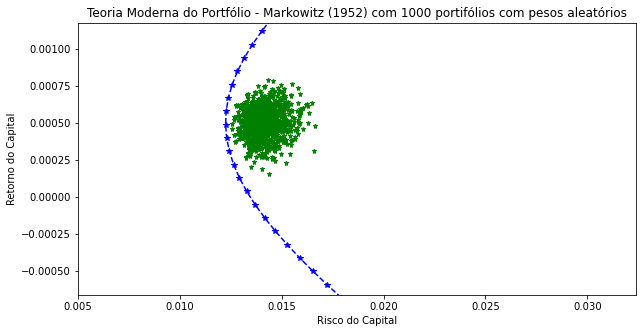

In [22]:
fig = plt.subplots(figsize=(10,5))
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)
plt.axis([0.005,np.max(SIG),np.min(MU)-0.0001,np.max(MU)+0.0001])

plt.plot(risk_at_target_mus,target_mus,'b*',linestyle='dashed')
plt.title('Teoria Moderna do Portfólio - Markowitz (1952) com 1000 portifólios com pesos aleatórios')
plt.ylabel('Retorno do Capital')
plt.xlabel('Risco do Capital')

<div id="Cálculo dos retornos e desvios para os portfólios obtidos no período de coleta de dados.">
    <h2>6) Cálculo dos retornos e desvios para os portfólios obtidos no período de coleta de dados.</h2>
</div>

In [23]:
retp=[]
risp=[]
q=matrixpesos.T
C=retornos.cov()
MU=retornos.mean()
SIG=retornos.std()
retp.append(np.dot(pd.DataFrame(q).transpose(),MU)[0])
risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])

<b>PESOS, RETORNOS E DESVIO PADRÃO DA CARTEIRA DE MARKOWITZ PARA O PORTFÓLIO DE MÍNIMO DESVIO</b>

In [24]:
pesosCLA*100

,Pesos
YDUQ3,0.809656
ITUB3,12.252411
CIEL3,12.951231
DTEX3,0.344537
MEAL3,12.945634
RADL3,21.795290
WEGE3,22.852685
QUAL3,4.487532
LIGT3,1.488226
MULT3,10.072797


In [25]:
print('Retorno da Carteira CLA '+str(retp[0]*100)+'%') 
print('Desvio Padrão da Carteira CLA '+str(risp[0]*100)+'%')

Retorno da Carteira CLA 0.05038953641813142%
Desvio Padrão da Carteira CLA 1.2240615488362931%


<b>PESOS, RETORNOS E DESVIO PADRÃO DA CARTEIRA HRP</b>

In [26]:
pesosHRP=hrp_weights.T
pesosHRP.columns=['Pesos']
matrixpesosHRP=np.array([pesosHRP['Pesos']])
#print(matrixpesosHRP)

In [27]:
retp=[]
risp=[]
q=matrixpesosHRP.T
C=retornos.cov()
MU=retornos.mean()
SIG=retornos.std()
retp.append(np.dot(pd.DataFrame(q).transpose(),MU)[0])
risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])

<b>PESOS, RETORNOS E DESVIO PADRÃO DA CARTEIRA HRP</b>

In [28]:
pesosHRP*100

,Pesos
MEAL3,10.053353
QUAL3,9.037981
YDUQ3,6.106652
RADL3,15.817236
LIGT3,5.504934
CIEL3,12.021791
WEGE3,15.597173
DTEX3,7.367407
ITUB3,9.758519
MULT3,8.734952


In [29]:
print('Retorno da Carteira HRP '+str(retp[0]*100)+'%') 
print('Desvio Padrão da Carteira HRP '+str(risp[0]*100)+'%')

Retorno da Carteira HRP 0.06179837065367608%
Desvio Padrão da Carteira HRP 1.3730293859806342%


<div id="Cálculo do desempenho das carteiras no ano subsequente.">
    <h2>7) Cálculo do desempenho das carteiras no ano subsequente.</h2>
</div>

<b>AQUISIÇÃO DE DADOS PARA O ANO SEGUINTE</b>

In [30]:
start_date = '2019-01-01'
end_date='2019-12-31'

string = '.SA'
my_new_list = [x + string for x in escolhas]

output2 = None
sym=[]
df2 = pd.DataFrame()

for sy in tqdm(my_new_list): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date, end_date)["Adj Close"]
        
        if output2 is None:
            df2 = stock
            output2 = df2    
            sym.append(sy[:-3])
        else:
            df2 = stock
            output2=pd.concat([output2,df2],axis=1)     
            sym.append(sy[:-3])
    except:
        print("Erro "+sy)
        
output2.columns=sym
output2.head()

100%|██████████| 10/10 [00:41<00:00,  4.11s/it]


,YDUQ3,ITUB3,CIEL3,DTEX3,MEAL3,RADL3,WEGE3,QUAL3,LIGT3,MULT3
Date,,,,,,,,,,
2019-01-02,23.568880,28.839018,8.763200,11.359365,6.948737,11.174402,17.474461,11.750819,16.060246,24.063623
2019-01-03,23.549911,29.100702,8.553904,11.349993,6.888834,11.148781,17.872934,11.819739,16.756414,24.237436
2019-01-04,23.910318,28.613432,9.236394,11.340622,6.938753,11.308415,18.077028,11.612979,16.891781,23.744963
2019-01-07,23.436096,28.983400,9.154496,11.340622,6.898818,11.056154,17.795181,11.268380,16.717739,23.406992
2019-01-08,23.654240,29.055590,8.845098,11.209408,6.988672,11.460167,17.649401,11.457911,16.737078,23.242834


In [31]:
output2.tail()

,YDUQ3,ITUB3,CIEL3,DTEX3,MEAL3,RADL3,WEGE3,QUAL3,LIGT3,MULT3
Date,,,,,,,,,,
2019-12-20,46.487774,29.983950,8.228002,15.013592,8.58,21.309217,33.415516,33.987556,21.745295,31.266497
2019-12-23,47.337925,30.375587,8.286285,15.513083,8.58,21.525749,33.354553,33.527023,22.642811,31.422779
2019-12-26,46.951492,30.834085,8.451429,16.108633,8.70,21.801868,34.400894,35.111263,23.179371,32.497234
2019-12-27,47.144707,30.719460,8.296001,16.166265,8.57,21.835640,34.884583,34.696781,23.315948,32.272579
2019-12-30,45.888802,30.595287,8.130858,16.060606,8.40,22.177320,34.213345,34.171772,23.179371,32.331181


In [32]:
retornoNovo = output2.pct_change()

In [33]:
retornoNovo

,YDUQ3,ITUB3,CIEL3,DTEX3,MEAL3,RADL3,WEGE3,QUAL3,LIGT3,MULT3
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.000805,0.009074,-0.023884,-0.000825,-0.008621,-0.002293,0.022803,0.005865,0.043347,0.007223
2019-01-04,0.015304,-0.016744,0.079787,-0.000826,0.007246,0.014319,0.011419,-0.017493,0.008078,-0.020319
2019-01-07,-0.019833,0.012930,-0.008867,0.000000,-0.005755,-0.022307,-0.015591,-0.029674,-0.010303,-0.014233
2019-01-08,0.009308,0.002491,-0.033797,-0.011570,0.013025,0.036542,-0.008192,0.016820,0.001157,-0.007013
...,...,...,...,...,...,...,...,...,...,...
2019-12-20,-0.031791,-0.008215,-0.008197,0.010343,0.011792,0.014278,0.008631,-0.002703,-0.001344,0.011055
2019-12-23,0.018288,0.013062,0.007084,0.033269,0.000000,0.010161,-0.001824,-0.013550,0.041274,0.004998
2019-12-26,-0.008163,0.015094,0.019930,0.038390,0.013986,0.012827,0.031370,0.047253,0.023697,0.034194


In [34]:
retornoNovo.describe()

,YDUQ3,ITUB3,CIEL3,DTEX3,MEAL3,RADL3,WEGE3,QUAL3,LIGT3,MULT3
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.003053,0.000333,0.000167,0.001581,0.000933,0.002973,0.002864,0.004792,0.001704,0.001339
std,0.026282,0.013662,0.031061,0.018668,0.018112,0.019264,0.016099,0.031542,0.020668,0.016633
min,-0.055910,-0.037334,-0.074240,-0.044764,-0.049180,-0.045454,-0.049012,-0.058177,-0.069973,-0.037744
25%,-0.015737,-0.008774,-0.020242,-0.011100,-0.009909,-0.008251,-0.007386,-0.010176,-0.010253,-0.008771
50%,0.000392,-0.000644,-0.005707,0.000795,0.000000,0.001732,0.003332,0.001845,0.001266,0.000970
75%,0.019253,0.009714,0.018822,0.010282,0.010943,0.012987,0.013270,0.016831,0.012418,0.012504
max,0.081478,0.039215,0.153315,0.071928,0.083429,0.092486,0.051487,0.366363,0.101299,0.063978


<b>MULTIPLICAÇÃO DOS PESOS PELOS RETORNOS DE CADA ATIVO EM CADA CARTEIRA</b>

In [35]:
pesosCLA

,Pesos
YDUQ3,0.008097
ITUB3,0.122524
CIEL3,0.129512
DTEX3,0.003445
MEAL3,0.129456
RADL3,0.217953
WEGE3,0.228527
QUAL3,0.044875
LIGT3,0.014882
MULT3,0.100728


In [36]:
pesosCLA2=pd.Series(pesosCLA['Pesos'])

In [37]:
retornoCLA=retornoNovo*pesosCLA2

In [38]:
retornoCLA

,YDUQ3,ITUB3,CIEL3,DTEX3,MEAL3,RADL3,WEGE3,QUAL3,LIGT3,MULT3
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.000007,0.001112,-0.003093,-0.000003,-0.001116,-0.000500,0.005211,0.000263,0.000645,0.000728
2019-01-04,0.000124,-0.002052,0.010333,-0.000003,0.000938,0.003121,0.002610,-0.000785,0.000120,-0.002047
2019-01-07,-0.000161,0.001584,-0.001148,0.000000,-0.000745,-0.004862,-0.003563,-0.001332,-0.000153,-0.001434
2019-01-08,0.000075,0.000305,-0.004377,-0.000040,0.001686,0.007964,-0.001872,0.000755,0.000017,-0.000706
...,...,...,...,...,...,...,...,...,...,...
2019-12-20,-0.000257,-0.001007,-0.001062,0.000036,0.001527,0.003112,0.001972,-0.000121,-0.000020,0.001114
2019-12-23,0.000148,0.001600,0.000917,0.000115,0.000000,0.002215,-0.000417,-0.000608,0.000614,0.000503
2019-12-26,-0.000066,0.001849,0.002581,0.000132,0.001811,0.002796,0.007169,0.002120,0.000353,0.003444


<b>TRANSFORMAÇÃO DOS RETORNOS EM RETORNOS ACUMULADOS</b>

In [39]:
historicoCLA=retornoCLA.sum(axis=1)
historico_acumuladoCLA=(1+historicoCLA).cumprod()
historico_acumuladoCLA.iloc[0]=1

In [40]:
historico_acumuladoCLA

Date
2019-01-02    1.000000
2019-01-03    1.003240
2019-01-04    1.015640
2019-01-07    1.003642
2019-01-08    1.007464
                ...   
2019-12-20    1.539131
2019-12-23    1.546962
2019-12-26    1.581288
2019-12-27    1.577630
2019-12-30    1.565877
Length: 247, dtype: float64

In [41]:
pesosHRP=pesosHRP.T
pesosHRP = pesosHRP[escolhas]


In [42]:
pesosHRP

,YDUQ3,ITUB3,CIEL3,DTEX3,MEAL3,RADL3,WEGE3,QUAL3,LIGT3,MULT3
Pesos,0.061067,0.097585,0.120218,0.073674,0.100534,0.158172,0.155972,0.09038,0.055049,0.08735


In [43]:
pesosHRP2=pd.Series(pesosHRP.iloc[0])
retornoHRP=retornoNovo*pesosHRP2

In [44]:
retornoHRP

,YDUQ3,ITUB3,CIEL3,DTEX3,MEAL3,RADL3,WEGE3,QUAL3,LIGT3,MULT3
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.000049,0.000885,-0.002871,-0.000061,-0.000867,-0.000363,0.003557,0.000530,0.002386,0.000631
2019-01-04,0.000935,-0.001634,0.009592,-0.000061,0.000728,0.002265,0.001781,-0.001581,0.000445,-0.001775
2019-01-07,-0.001211,0.001262,-0.001066,0.000000,-0.000579,-0.003528,-0.002432,-0.002682,-0.000567,-0.001243
2019-01-08,0.000568,0.000243,-0.004063,-0.000852,0.001309,0.005780,-0.001278,0.001520,0.000064,-0.000613
...,...,...,...,...,...,...,...,...,...,...
2019-12-20,-0.001941,-0.000802,-0.000985,0.000762,0.001186,0.002258,0.001346,-0.000244,-0.000074,0.000966
2019-12-23,0.001117,0.001275,0.000852,0.002451,0.000000,0.001607,-0.000285,-0.001225,0.002272,0.000437
2019-12-26,-0.000499,0.001473,0.002396,0.002828,0.001406,0.002029,0.004893,0.004271,0.001304,0.002987


In [45]:
historicoHRP=retornoHRP.sum(axis=1)
historico_acumuladoHRP=(1+historicoHRP).cumprod()
historico_acumuladoHRP.iloc[0]=1

In [46]:
historico_acumuladoHRP

Date
2019-01-02    1.000000
2019-01-03    1.003779
2019-01-04    1.014514
2019-01-07    1.002293
2019-01-08    1.004978
                ...   
2019-12-20    1.580544
2019-12-23    1.593980
2019-12-26    1.630783
2019-12-27    1.626756
2019-12-30    1.612200
Length: 247, dtype: float64

<b>AQUISIÇÃO DO HISTÓRICO DO ÍNDICE BOVESPA E CDI PARA COMPARAR COM CARTEIRAS</b>

In [47]:
from pandas_datareader import data as wb
bovespa = pd.DataFrame()
bovespa=wb.DataReader('^BVSP', data_source='yahoo', start=start_date,end=end_date)['Adj Close']
pct_bovespa = bovespa.pct_change()
ibov_acumulado=(1+pct_bovespa).cumprod()
ibov_acumulado.iloc[0]=1

In [48]:
ibov_acumulado

Date
2019-01-02    1.000000
2019-01-03    1.006065
2019-01-04    1.009109
2019-01-07    1.007548
2019-01-08    1.011207
                ...   
2019-12-20    1.264899
2019-12-23    1.273052
2019-12-26    1.287775
2019-12-27    1.280425
2019-12-30    1.274162
Name: Adj Close, Length: 247, dtype: float64

In [49]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  PG = pd.read_json(url)
  df=pd.DataFrame(PG)  
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

cdi=consulta_bc(12)
cdi=cdi[cdi.index>=start_date]
cdi_acumulado=(1+cdi[cdi.index<=end_date]/100).cumprod()
cdi_acumulado.iloc[0]=1
#cdi_acumulado.drop(cdi_acumulado.tail(1).index, inplace = True) 

In [50]:
cdi_acumulado

,valor
data,
2019-01-02,1.000000
2019-01-03,1.000492
2019-01-04,1.000739
2019-01-07,1.000985
2019-01-08,1.001232
...,...
2019-12-24,1.058875
2019-12-26,1.059056
2019-12-27,1.059237


<div id="Plot comparativo entre carteiras, ibovespa e CDI.">
    <h2>8) Plot comparativo entre carteiras, ibovespa e CDI.</h2>
</div>

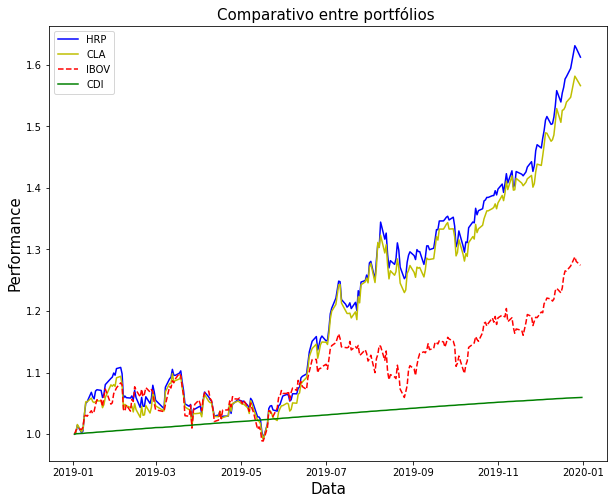

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(historico_acumuladoHRP,  '-b', label='HRP')
ax.plot(historico_acumuladoCLA,  '-y', label='CLA')
ax.plot(ibov_acumulado,  '--r', label='IBOV')
ax.plot(cdi_acumulado,  '-g', label='CDI')
ax.set_ylabel("Performance",fontsize=15)  
ax.set_xlabel("Data",fontsize=15)  
ax.set_title("Comparativo entre portfólios ",fontsize=15)
leg = ax.legend();

<b>DADOS DE PERFORMANCE E RISCO PARA AS CARTEIRAS NO ANO SUBSEQUENTE</b>

In [52]:
print('Multiplicação do patrimônio pela carteira HRP:')
print('%.4f' % historico_acumuladoHRP[-1])
print('Multiplicação do patrimônio pela carteira CLA:')
print('%.4f'% historico_acumuladoCLA[-1])

Multiplicação do patrimônio pela carteira HRP:
1.6122
Multiplicação do patrimônio pela carteira CLA:
1.5659


In [53]:
retornosHRP = historico_acumuladoHRP.pct_change().iloc[1:]
meanHRP=retornosHRP.mean()
stdHRP=retornosHRP.std()

retornosCLA = historico_acumuladoCLA.pct_change().iloc[1:]
meanCLA=retornosCLA.mean()
stdCLA=retornosCLA.std()

In [54]:
pesosHRP.T*100

,Pesos
YDUQ3,6.106652
ITUB3,9.758519
CIEL3,12.021791
DTEX3,7.367407
MEAL3,10.053353
RADL3,15.817236
WEGE3,15.597173
QUAL3,9.037981
LIGT3,5.504934
MULT3,8.734952


In [55]:
print('Média retornos HRP %.4f' % (meanHRP*100)+'%')
print('Desvio Padrão retornos HRP %.4f'% (stdHRP*100)+'%')
sharpeHRP=((historico_acumuladoHRP[-1]-1)/(stdHRP*math.sqrt(252)))
print('Sharpe HRP %.4f'% (sharpeHRP))

Média retornos HRP 0.2010%
Desvio Padrão retornos HRP 1.1568%
Sharpe HRP 3.3338


In [56]:
pesosCLA*100

,Pesos
YDUQ3,0.809656
ITUB3,12.252411
CIEL3,12.951231
DTEX3,0.344537
MEAL3,12.945634
RADL3,21.795290
WEGE3,22.852685
QUAL3,4.487532
LIGT3,1.488226
MULT3,10.072797


In [57]:
print('Média retornos CLA %.4f' % (meanCLA*100)+'%')
print('Desvio Padrão retornos CLA %.4f'% (stdCLA*100)+'%')
sharpeCLA=((historico_acumuladoCLA[-1]-1)/(stdCLA*math.sqrt(252)))
print('Sharpe CLA %.4f'% (sharpeCLA))

Média retornos CLA 0.1891%
Desvio Padrão retornos CLA 1.1549%
Sharpe CLA 3.0866


Text(0.5, 1.0, 'Hierarchical Clustering Dendogram')

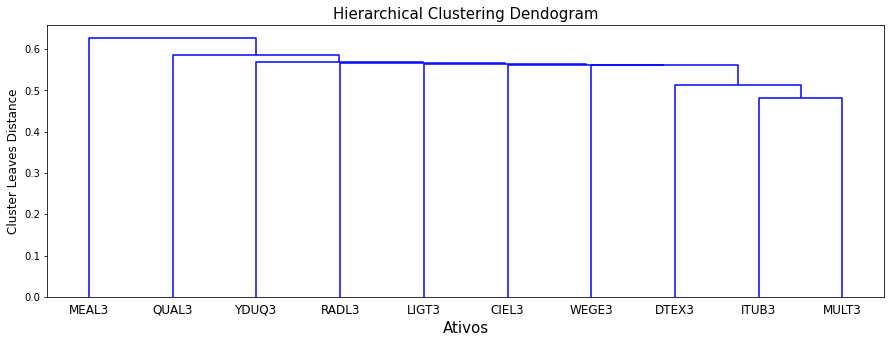

In [58]:
f, ax = plt.subplots(figsize=(15, 5))
# Plot Dendrogram
hrp.plot_clusters(assets=preços.columns)
plt.yticks(rotation=0) 
ax.set_ylabel("Cluster Leaves Distance",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Hierarchical Clustering Dendogram",fontsize=15)

<div id="Resumo dos resultados">
    <h2>9) Resumo dos resultados.</h2>
</div>

In [59]:
if sharpeHRP>sharpeCLA:
    print('HRP MELHOR SHARPE')
else:
    print('CLA MELHOR SHARPE')
    
if stdCLA>stdHRP:
    print('HRP MENOR STD')
else:
    print('CLA MENOR STD')
    
if meanHRP>meanCLA:
    print('HRP MELHOR MÉDIA DE RETORNOS')
else:
    print('CLA MELHOR MÉDIA DE RETORNOS')

HRP MELHOR SHARPE
CLA MENOR STD
HRP MELHOR MÉDIA DE RETORNOS


Text(0, 0.5, 'Peso')

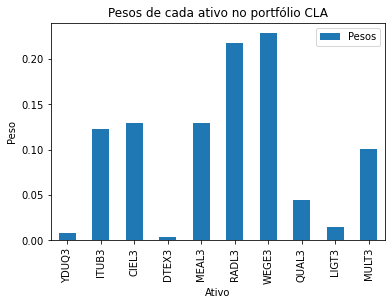

In [60]:
pesosCLA.plot(kind="bar")
plt.title("Pesos de cada ativo no portfólio CLA")
plt.xlabel("Ativo")
plt.ylabel("Peso")

Text(0, 0.5, 'Peso')

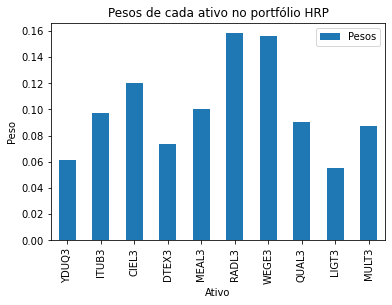

In [61]:
pesosHRP.T.plot(kind="bar")
plt.title("Pesos de cada ativo no portfólio HRP")
plt.xlabel("Ativo")
plt.ylabel("Peso")

In [62]:
retornosHRP.describe()

count    246.000000
mean       0.002010
std        0.011568
min       -0.035827
25%       -0.004913
50%        0.002189
75%        0.009133
max        0.033396
dtype: float64

In [63]:
retornosCLA.describe()

count    246.000000
mean       0.001891
std        0.011549
min       -0.037056
25%       -0.005872
50%        0.001464
75%        0.010120
max        0.031117
dtype: float64

In [64]:
pct_bovespa.describe()

count    246.000000
mean       0.001048
std        0.011168
min       -0.037381
25%       -0.005165
50%        0.001924
75%        0.008556
max        0.027914
Name: Adj Close, dtype: float64

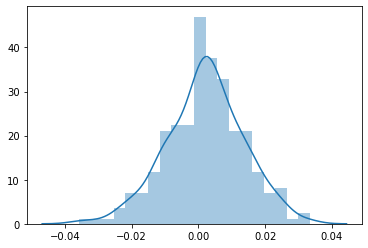

In [65]:
import seaborn as sns

sns.distplot(retornosHRP,bins=20)

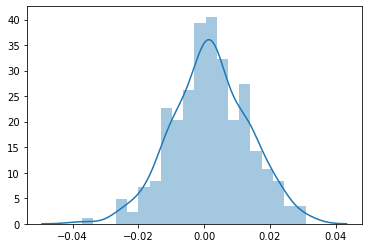

In [66]:
sns.distplot(retornosCLA,bins=20)

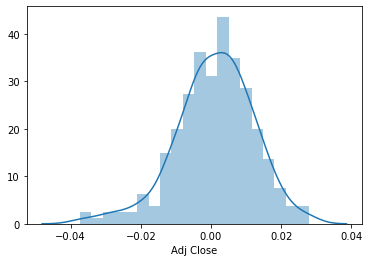

In [67]:
sns.distplot(pct_bovespa,bins=20)